In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [ ]:
run_id = 'BP_2Predictors_live_training_Horizon30'

In [ ]:
os.mkdir(run_id)

In [ ]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [2]:
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

#### Prophet and Neural prophet training set-up

In [ ]:
#training_data = DataLoader('BP', '2010-02-01', '2018-02-01')
#training_data = training_data.get_adjclose()

#### Normal set-up

In [24]:
# AlterNativeDataLoader data retrievel trough the investpy python library from investing.com - since data-reader not working
#predict = AlternativeDataLoader('F','United States', '01/02/2018', '01/05/2018', 'stock')
#predict = AlternativeDataLoader('S&P 500','United States', '01/02/2018', '01/05/2018', 'index')
predict = AlternativeDataLoader('BP','United States', '01/02/2018', '01/05/2018', 'stock')

predict = predict.get_close()

In [25]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [26]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_5(predict_req, 30)

In [27]:
#individual_predictors_forecasts = individual_predictors_template2(training_data, 30)

### System disagreement between individual predictor forecasts

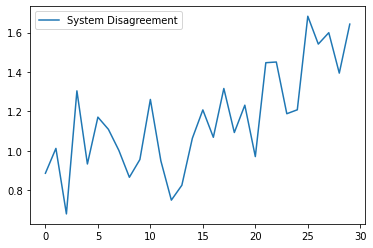

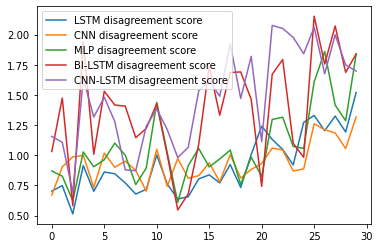

In [28]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [29]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

#### Only using correcting consensus algorithm:

In [30]:
#consensus_forecasts = consensus_optimal(individual_predictors_forecasts, real)

In [31]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [32]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,MLP,BI-LSTM,CNN-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score
Date,,,,,,,,,,,,,,,,,,,
2018-03-02,38.925816,38.925816,38.925816,38.925816,39.724711,38.925816,38.925816,38.70,38.442211,38.605385,39.605186,37.894630,40.081669,0.885928,0.702637,0.670003,0.869963,1.031186,1.155853
2018-03-05,39.000677,38.932742,38.966710,38.476971,39.021814,38.773982,38.887329,39.16,39.252335,38.476971,39.640270,37.526466,40.107342,1.012008,0.748835,0.903908,0.826422,1.474210,1.106665
2018-03-06,39.107102,39.123217,39.084841,39.135403,38.967808,39.277610,39.090701,39.55,39.135403,38.120472,39.685200,38.795433,39.799004,0.679493,0.513660,0.986630,0.623619,0.581654,0.691901
2018-03-07,38.706929,38.831039,38.741016,39.327461,39.192035,39.142314,38.796075,39.31,38.760048,38.336281,39.327461,36.765625,40.345230,1.304062,0.914157,0.998911,1.027640,1.941304,1.638301
2018-03-08,38.663641,38.758411,38.690255,39.293377,38.583968,39.278390,38.861091,39.46,38.275669,38.113815,39.293377,37.654892,39.980450,0.932908,0.701024,0.733395,0.904565,1.008749,1.316809
2018-03-09,38.775132,38.908100,38.841432,39.392990,39.047392,39.570580,39.069744,39.66,38.883514,38.098957,39.392990,37.244434,40.255764,1.170671,0.861073,1.017984,0.962968,1.530698,1.480632
2018-03-12,38.393896,38.549237,38.470381,39.374939,38.505690,39.271748,38.769802,39.85,38.105629,37.837753,39.374939,36.977226,39.673931,1.108895,0.846778,0.900353,1.100640,1.416669,1.280035
2018-03-13,38.490922,38.637960,38.584290,39.288494,38.683203,39.954558,39.005866,39.55,38.746727,37.843849,39.491631,37.083908,39.288494,1.001614,0.770473,0.951049,1.000709,1.407014,0.878827
2018-03-14,38.423336,38.589038,38.510034,39.102966,38.551603,39.483709,38.999842,38.87,38.710114,37.730377,39.102966,37.277515,39.295708,0.865436,0.678156,0.874104,0.756727,1.145821,0.872372


In [13]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

NameError: name 'dir_' is not defined

### Absolute error analysis of individual predictors and consensus forecasts

In [33]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
Date,,,,,,,,,,,,,,,,,,
2018-03-02,0.257789,0.094615,0.905186,0.805370,1.381669,0.225816,0.225816,0.225816,0.225816,1.024711,0.225816,0.225816,0.702637,0.670003,0.869963,1.031186,1.155853,0.885928
2018-03-05,0.092335,0.683029,0.480270,1.633534,0.947342,0.159323,0.227258,0.193290,0.683029,0.138186,0.386018,0.272671,0.748835,0.903908,0.826422,1.474210,1.106665,1.012008
2018-03-06,0.414597,1.429528,0.135200,0.754567,0.249004,0.442898,0.426783,0.465159,0.414597,0.582192,0.272390,0.459299,0.513660,0.986630,0.623619,0.581654,0.691901,0.679493
2018-03-07,0.549952,0.973719,0.017461,2.544375,1.035230,0.603071,0.478961,0.568984,0.017461,0.117965,0.167686,0.513925,0.914157,0.998911,1.027640,1.941304,1.638301,1.304062
2018-03-08,1.184331,1.346185,0.166623,1.805108,0.520450,0.796359,0.701589,0.769745,0.166623,0.876032,0.181610,0.598909,0.701024,0.733395,0.904565,1.008749,1.316809,0.932908
2018-03-09,0.776486,1.561043,0.267010,2.415566,0.595764,0.884868,0.751900,0.818568,0.267010,0.612608,0.089420,0.590256,0.861073,1.017984,0.962968,1.530698,1.480632,1.170671
2018-03-12,1.744371,2.012247,0.475061,2.872774,0.176069,1.456104,1.300763,1.379619,0.475061,1.344310,0.578252,1.080198,0.846778,0.900353,1.100640,1.416669,1.280035,1.108895
2018-03-13,0.803273,1.706151,0.058369,2.466092,0.261506,1.059078,0.912040,0.965710,0.261506,0.866797,0.404558,0.544134,0.770473,0.951049,1.000709,1.407014,0.878827,1.001614
2018-03-14,0.159886,1.139623,0.232966,1.592485,0.425708,0.446664,0.280962,0.359966,0.232966,0.318397,0.613709,0.129842,0.678156,0.874104,0.756727,1.145821,0.872372,0.865436


In [ ]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
LSTM absolute error,1.000000,0.986262,0.967039,0.948485,0.915221,0.991745,0.992056,0.991967,0.940713,0.983253,0.123570,0.979729,0.864073,0.617667,0.736071,0.419844,0.702476,0.756843
CNN absolute error,0.986262,1.000000,0.954616,0.957089,0.902081,0.992038,0.991431,0.991793,0.934578,0.979592,0.121221,0.983041,0.829025,0.679971,0.741487,0.443143,0.677964,0.759358
MLP absolute error,0.967039,0.954616,1.000000,0.940925,0.913943,0.976626,0.978893,0.977987,0.923050,0.979643,0.099851,0.975861,0.800016,0.549908,0.635589,0.443273,0.723704,0.726943
BI-LSTM absolute error,0.948485,0.957089,0.940925,1.000000,0.891394,0.973954,0.971328,0.971721,0.908882,0.950970,0.054178,0.971132,0.840001,0.683036,0.796344,0.661007,0.783737,0.877416
CNN-LSTM absolute error,0.915221,0.902081,0.913943,0.891394,1.000000,0.921414,0.926052,0.925422,0.970836,0.931042,-0.026927,0.929897,0.801177,0.602571,0.725333,0.438566,0.558090,0.703791
Average absolute error,0.991745,0.992038,0.976626,0.973954,0.921414,1.000000,0.999662,0.999836,0.944160,0.991039,0.101975,0.993009,0.842356,0.642142,0.736580,0.486464,0.714305,0.781130
NoMemory absolute error,0.992056,0.991431,0.978893,0.971328,0.926052,0.999662,1.000000,0.999881,0.947240,0.991678,0.098518,0.993574,0.842495,0.642426,0.731766,0.479823,0.710296,0.776694
Memory absolute error,0.991967,0.991793,0.977987,0.971721,0.925422,0.999836,0.999881,1.000000,0.946787,0.991967,0.099524,0.994003,0.841254,0.640602,0.731340,0.479501,0.708902,0.775620
Focus absolute error,0.940713,0.934578,0.923050,0.908882,0.970836,0.944160,0.947240,0.946787,1.000000,0.945860,0.027288,0.942591,0.794738,0.619419,0.715186,0.416918,0.547860,0.692103
Anchor absolute error,0.983253,0.979592,0.979643,0.950970,0.931042,0.991039,0.991678,0.991967,0.945860,1.000000,0.112472,0.989870,0.804108,0.587052,0.707323,0.427618,0.666628,0.726960


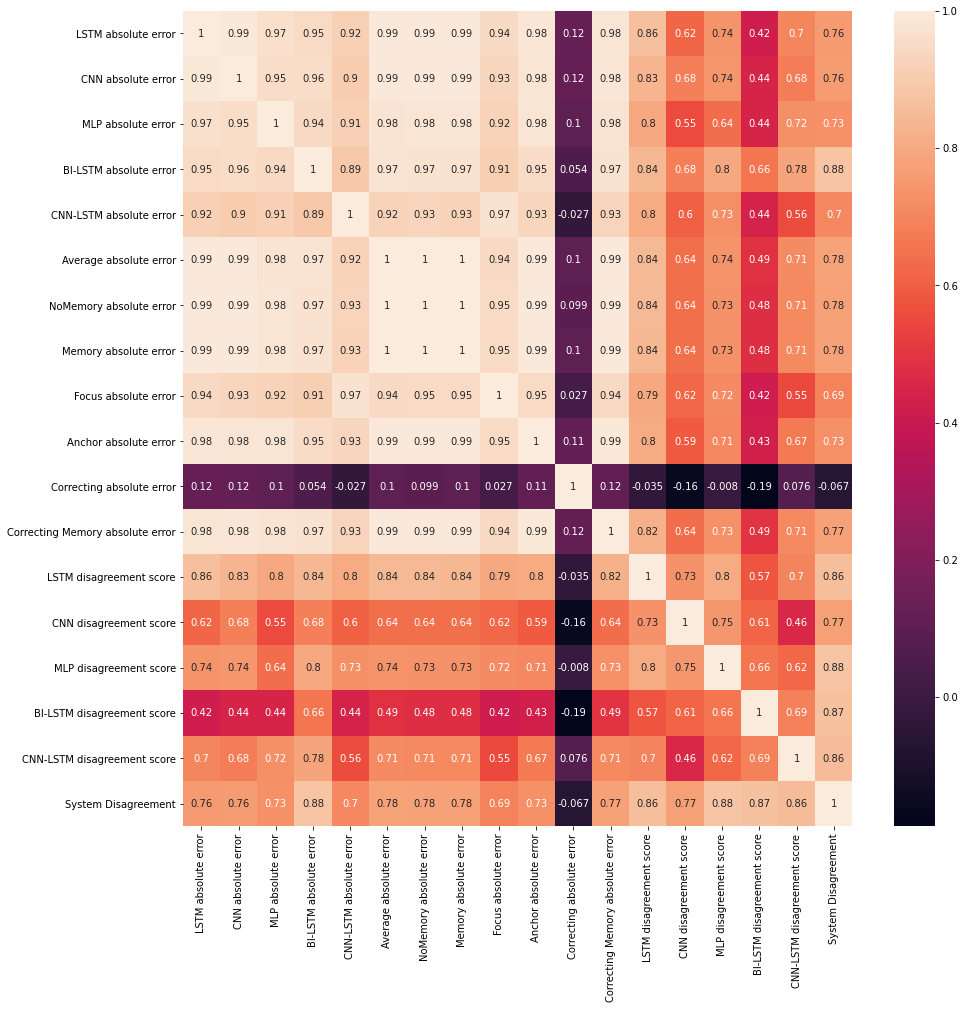

In [34]:
correlation_ = correlation(prediction_error, True)
correlation_

In [ ]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Average,10.063432
1,NoMemory,9.611765
2,Memory,9.529963
3,Focus,4.365357
4,Anchor,6.976006
5,Correcting,0.366099
6,Correcting Memory,4.599804
7,LSTM,13.908190
8,CNN,12.510514
9,MLP,6.238438


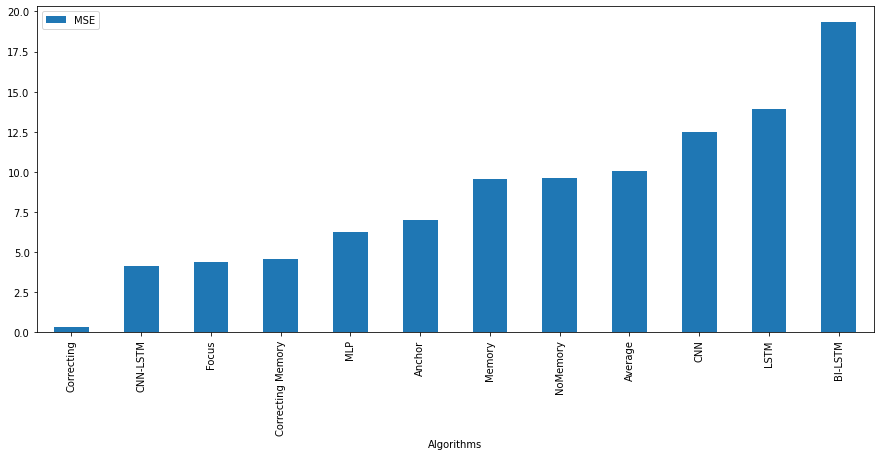

In [35]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.006154
1,NoMemory,0.005862
2,Memory,0.005808
3,Focus,0.002551
4,Anchor,0.004174
5,Correcting,0.000216
6,Correcting Memory,0.002696
7,LSTM,0.008708
8,CNN,0.007754
9,MLP,0.003719


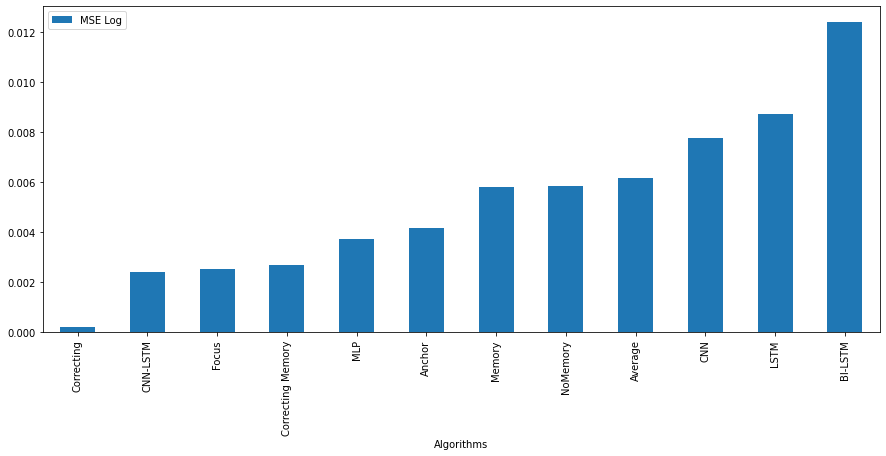

In [36]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,2.449632
1,NoMemory,2.352870
2,Memory,2.364519
3,Focus,1.415625
4,Anchor,2.048957
5,Correcting,0.476265
6,Correcting Memory,1.594874
7,LSTM,2.884238
8,CNN,2.949643
9,MLP,1.805421


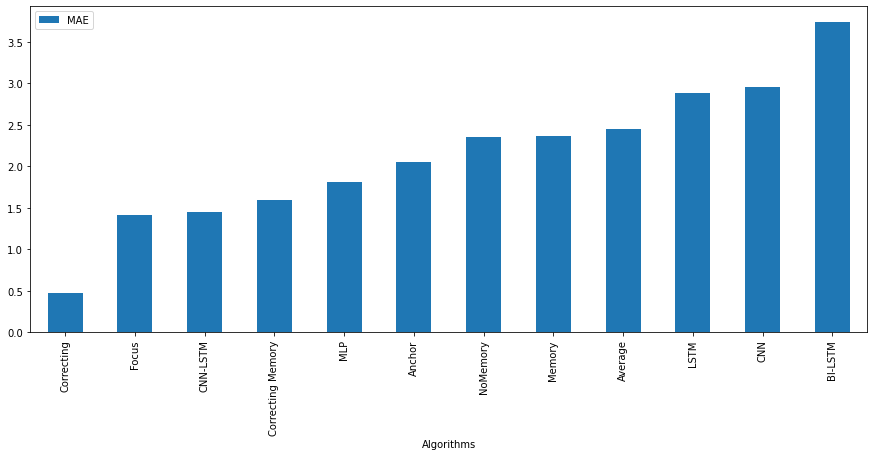

In [37]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

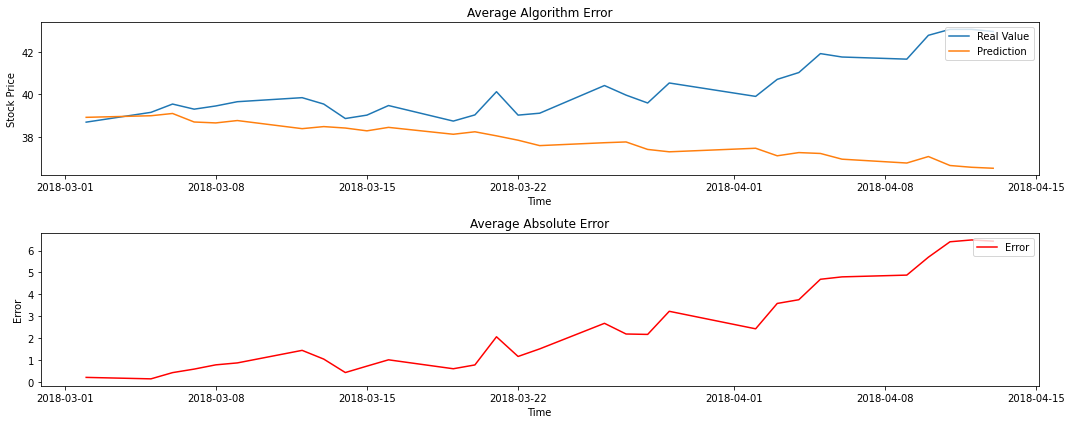

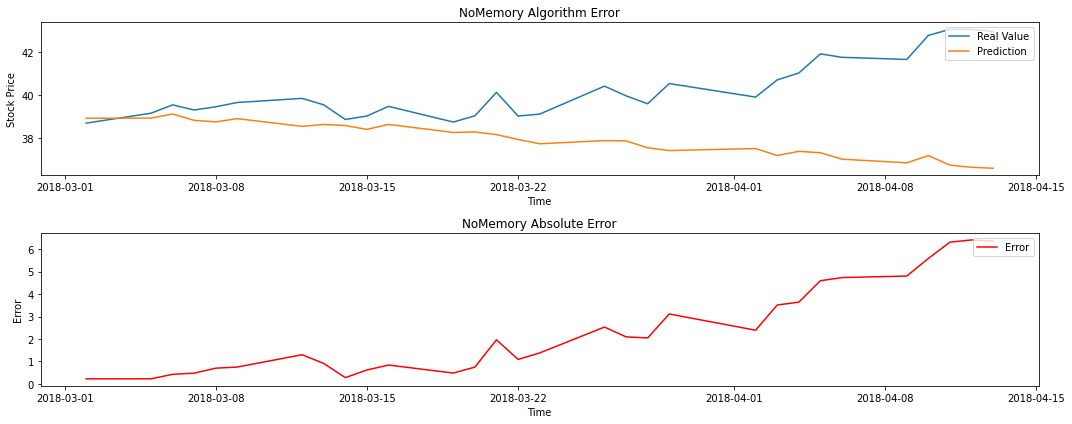

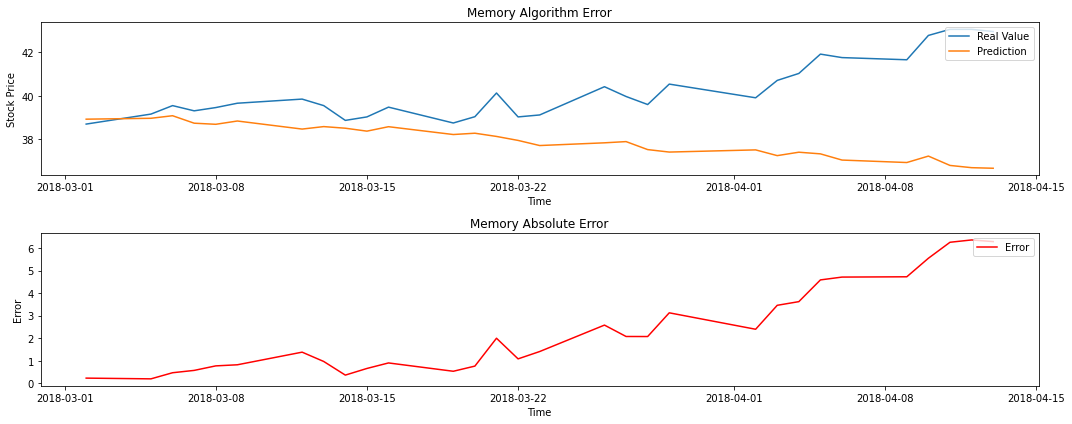

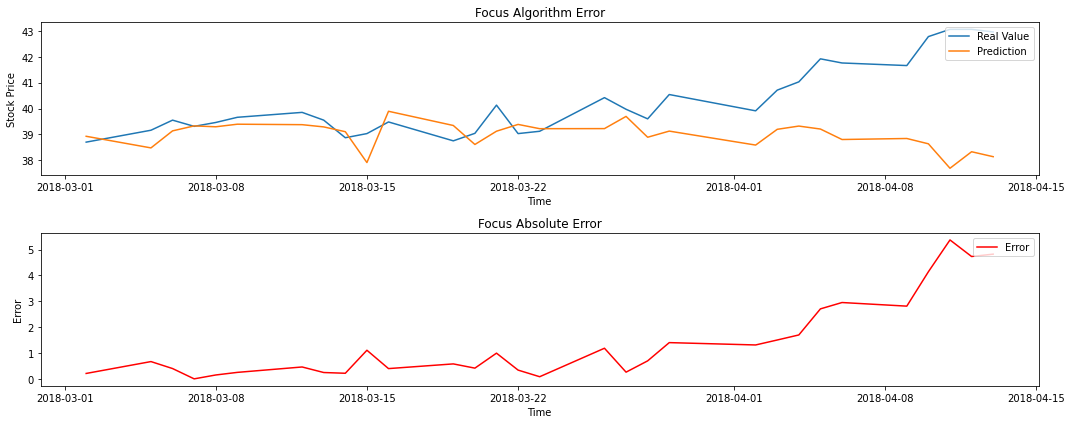

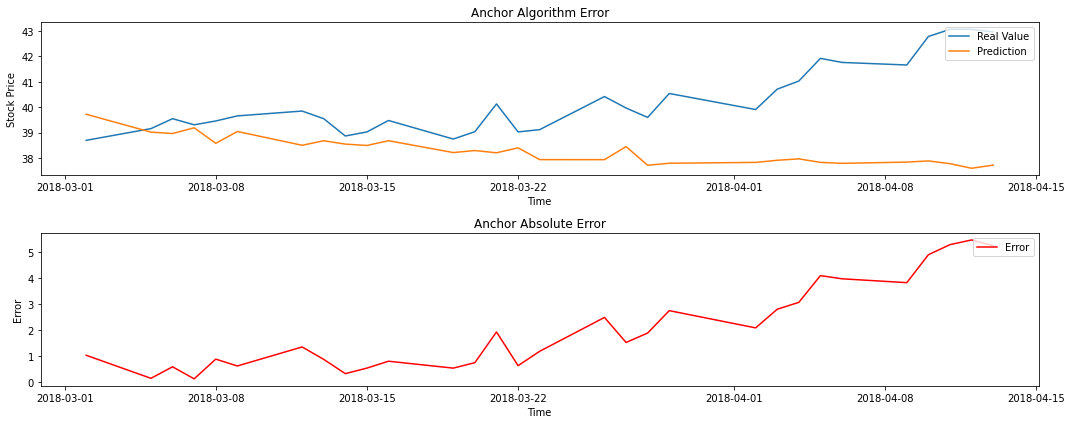

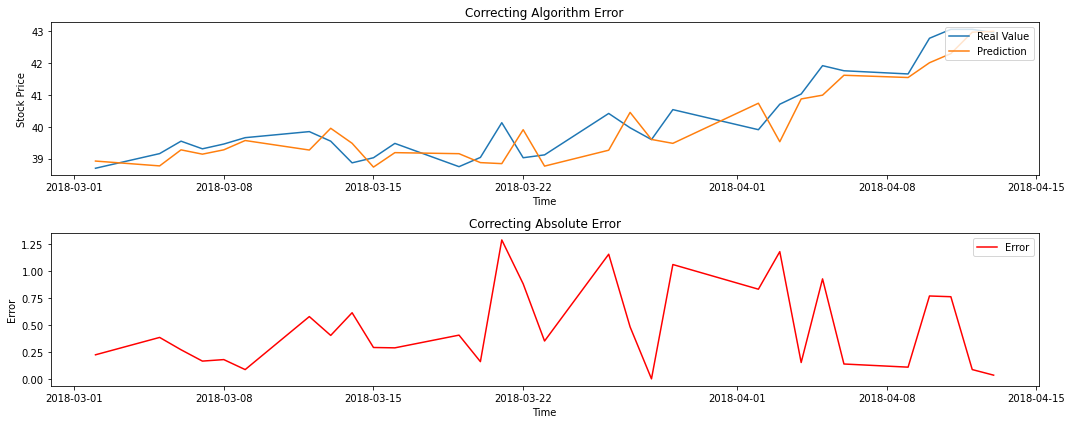

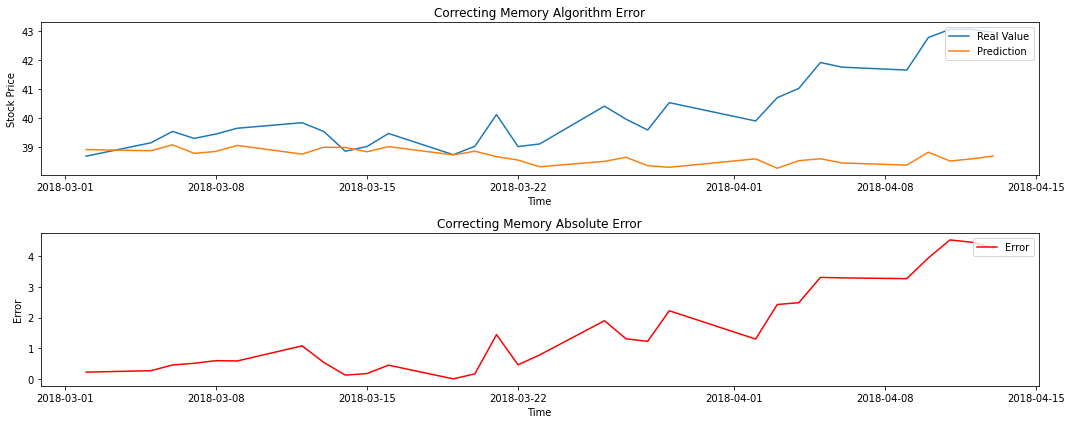

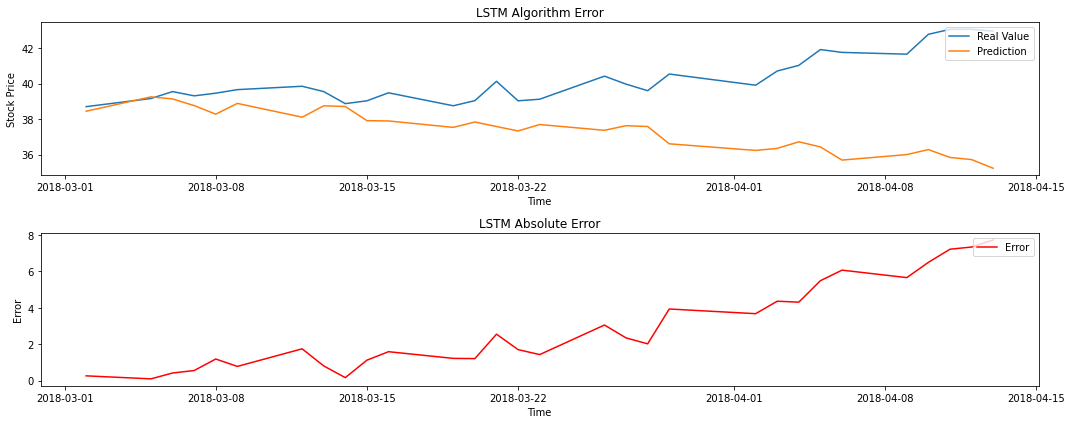

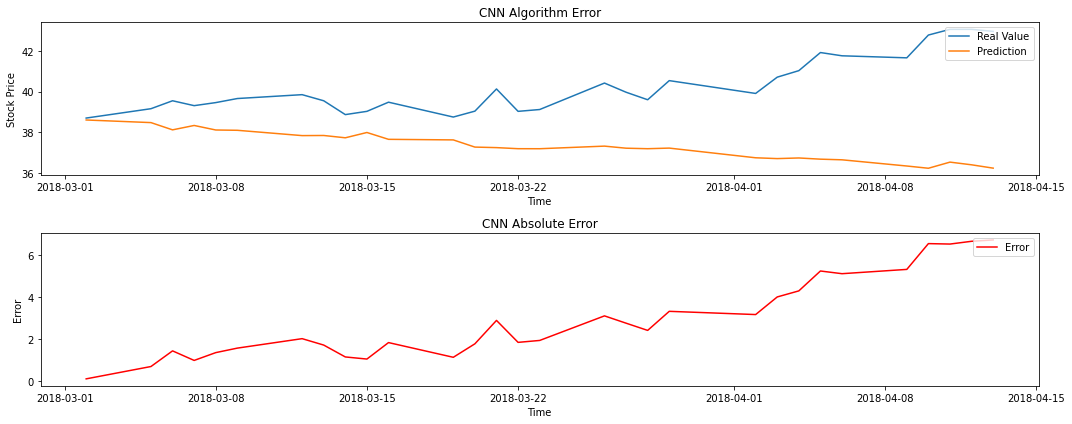

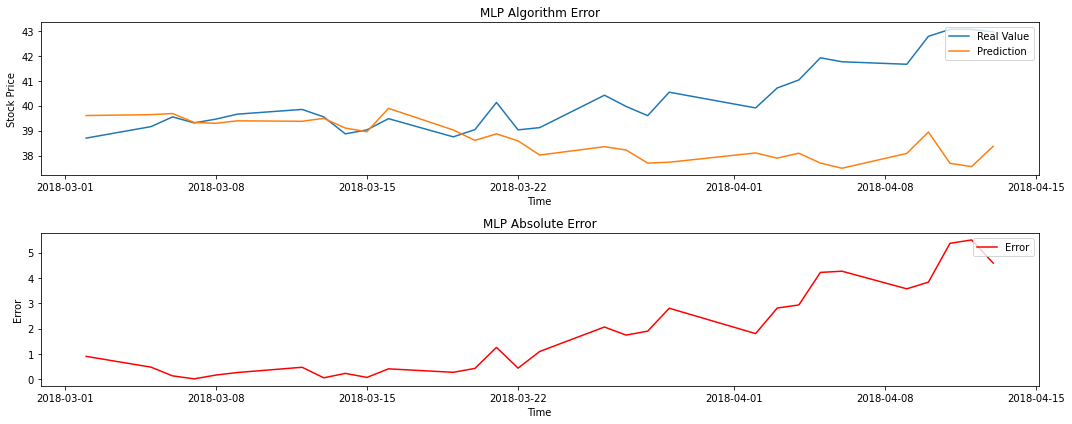

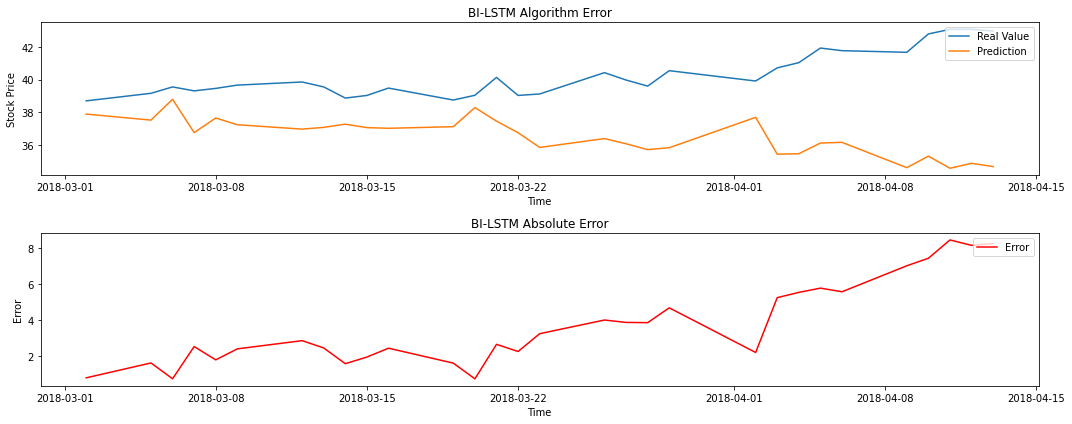

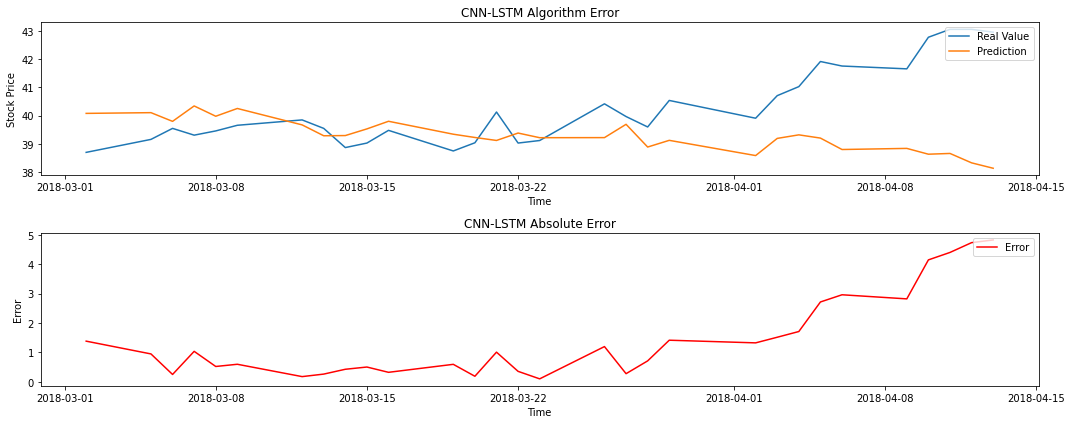

In [38]:
plot_performance(all_forecasts)